# Improved Bellman-Ford algorithm with Maximum Violation Permutation problem

## Authors: LUONG Ethan, PHAM Louis-Antoine

This project aims to improve Bellman-Ford algorithm's running times by using a specific order to traverse the vertices of a given graph.

In order to determine the said order, we use a greedy algorithm that successively seeks the sources, the targets, and the vertice with the largest gap in number between its successors and its ancestors, while there is still a node to study.

In [1]:
from algorithms import compute_shortest_paths, glouton_fas
import networkx as nx

%load_ext autoreload
%autoreload 2

### 1. Bellman-Ford Algorithm

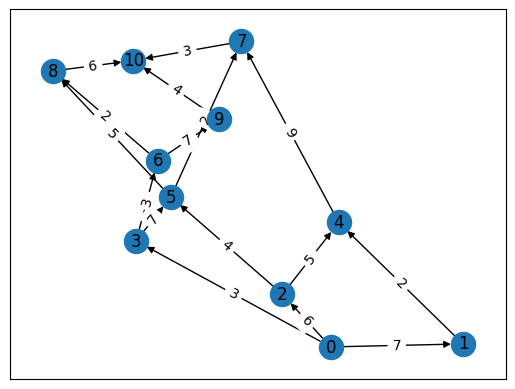

In [72]:
G1 = nx.DiGraph([(0,1,{'weight':7}), (0,2,{'weight':6}), (0,3,{'weight':3}), (1,4,{'weight':2}), (2,4,{'weight':5}), (2,5,{'weight':4}), (3,5,{'weight':7}), (3,6,{'weight':3}), (4,7,{'weight':9}), (5,7,{'weight':2}), (5,8,{'weight':5}), (6,8,{'weight':2}), (6,9,{'weight':7}), (7,10,{'weight':3}), (8,10,{'weight':6}), (9,10,{'weight':4})])

pos = nx.spring_layout(G1)
nx.draw_networkx(G1,pos,with_labels=True, arrows=True)
labels = {x[:2]: G1.get_edge_data(*x)['weight']  for x in G1.edges}
nx.draw_networkx_edge_labels(G1, pos, labels)
assert G1.nodes

Iterations: 2


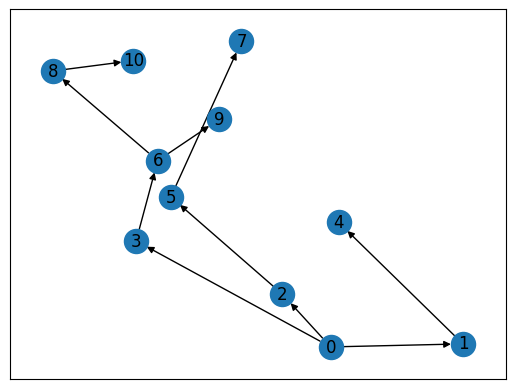

In [75]:
shortest_paths_graph, n_iterations = compute_shortest_paths(G1,0)
print(f'Number of iterations: {n_iterations}')
nx.draw_networkx(shortest_paths_graph, pos, with_labels=True, arrows=True)

### 2. Greedy Algorithm: GloutonFas

In [76]:
glouton_fas(shortest_paths_graph)
G2 = nx.DiGraph([(1,2), (1,3), (2,3), (3,4), (4,5), (4,6), (4,7), (5,7), (6,5), (6,8), (7,1), (8,2), (8,3)])
glouton_fas(G2)

[4, 6, 5, 8, 7, 1, 2, 3]